# EQUIVALENCE CLASS:
A stimulus class (usually produced through conditional discrimination in matching-to-sample) that includes all possible emergent relations among its members. The properties of an equivalence class are derived from the logical relations of reflexivity, symmetry, and transitivity. **Reflexivity** *refers to the matching of a sample to itself*, sometimes called identity matching (AA, BB, CC, in these examples, each letter pair represents a sample and its matching comparison stimulus). **Symmetry** *refers to the reversibility of a relation (if AB, then BA)*. **Transitivity** *refers to the transfer of the relation to new combinations through shared membership (if AB and BC, then AC)*. 
If these properties are characteristics of a matching to-sample performance, then training AB and BC may produce AC, BA, CA, and CB as emergent relations (reflexivity provides the three other possible relations, AA, BB, and CC). Given AB and BC, for example, the combination of symmetry and transitivity implies the CA relation. The emergence of all possible stimulus relations after only AB and BC are trained through contingencies is the criterion for calling the three stimuli members of an equivalence class. The class can be extended by training new stimulus relations (e.g., if CD is learned, then AD, DA, BD, DB, and DC may be created as emergent relations). Stimuli that are members of an equivalence class are likely also to be functionally equivalent. It remains to be seen whether the logical properties of these classes are fully consistent with their behavioral ones. Cf. **EQUIVALENCE RELATION**. ([source](http://www.scienceofbehavior.com/lms/mod/glossary/view.php?id=408&mode=letter&hook=E&sortkey=CREATION&sortorder=asc&fullsearch=0&page=3))


# Libraries

In [1]:
import sys
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from time import localtime, strftime

%matplotlib inline
plt.style.use('seaborn')

### Clasifiers dependences
from sklearn.utils import shuffle
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score

In [2]:
print("Python", sys.version)

Python 3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]


In [3]:
!conda info


     active environment : sociadisticas
    active env location : C:\Users\Alexis\.conda\envs\sociadisticas
            shell level : 2
       user config file : C:\Users\Alexis\.condarc
 populated config files : C:\Users\Alexis\.condarc
          conda version : 4.12.0
    conda-build version : 3.21.8
         python version : 3.7.12.final.0
       virtual packages : __cuda=11.1=0
                          __win=0=0
                          __archspec=1=x86_64
       base environment : C:\ProgramData\Anaconda3  (writable)
      conda av data dir : C:\ProgramData\Anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://conda.anaconda.org/conda-forge/win-64
                          https://conda.anaconda.org/conda-forge/noarch
                          https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          htt

In [4]:
def get_trials_subset(trials_info_df, trial_subset_name, array_embeddings_trials, array_answers_trials):
    # No-go Trials can not be filtered with this...
    element = array_embeddings_trials[:,0]
    test_elements = list(trials_info_df.index[((trials_info_df[["sample_c1_subset","sample_c2_subset","sample_c3_subset"]]==trial_subset_name).sum(axis=1)>0)])
    mask = np.isin(element, test_elements)
    values_subset= array_embeddings_trials[mask][:,1:]
    answers_subset=array_answers_trials[mask][:,1:]
    info_subset=trials_info_df.loc[test_elements,:]
    return values_subset,answers_subset,info_subset

def view_trial(trials_info_df,trial_values,trial_ans, n_trial, n_stimuli=4, n_modes=3, n_classes=5):
    print (trials_info_df.iloc[n_trial,:])
    print (np.array(trial_values[n_trial]).reshape((n_stimuli,n_modes,n_classes)))
    print (trial_ans[n_trial])

In [5]:
plt.style.use('apa')

# Stimuli subsets

## Trainning 
### Relation $A_{n}-B_{n}$ and $B_{n}-C_{n}$

In [6]:
train_pairs=np.array([["A1","B1"],["B1","C1"],
                      ["A2","B2"],["B2","C2"],
                      ["A3","B3"],["B3","C3"],
                      ["A4","B4"],["B4","C4"]#,
#                       ["A5","B5"],["B5","C5"],
#                       ["A6","B6"],["B6","C6"]
                     ])
explicit_train_pairs=np.array([["TX","TY"],["TY","TZ"], # Pairs for Explicit Training
                               ["TX","TZ"], # Transitivity trainning
                               ["TZ","TX"], # Equivalence  trainning
                               ["TX","TX"],["TY","TY"],["TZ","TZ"], # Reflexivity trainning
                               ["TY","TX"],["TZ","TY"]# Symmetry trainning
                              ])

## Reflexivity evaluation

### Given the sample stimulus $A_{n}$ the agent must select $A_{n}$ among the comparator stimuli

In [7]:
reflexiv_pairs=np.array([[stm,stm]for stm in [let+str(num) for let in ["A","B","C"] for num in range(1,5)]])
reflexiv_pairs

array([['A1', 'A1'],
       ['A2', 'A2'],
       ['A3', 'A3'],
       ['A4', 'A4'],
       ['B1', 'B1'],
       ['B2', 'B2'],
       ['B3', 'B3'],
       ['B4', 'B4'],
       ['C1', 'C1'],
       ['C2', 'C2'],
       ['C3', 'C3'],
       ['C4', 'C4']], dtype='<U2')

## Symmetry evaluation
### Given the trainning pairs, the agent must select the comparator $A_{n}$ in presence of the sample $B_{n}$  and the comparator $B_{n}$ in presence of the sample $C_{n}$ 

In [8]:
symmetry_pairs=np.array([[tr_pr[1],tr_pr[0]]for tr_pr in train_pairs])
symmetry_pairs

array([['B1', 'A1'],
       ['C1', 'B1'],
       ['B2', 'A2'],
       ['C2', 'B2'],
       ['B3', 'A3'],
       ['C3', 'B3'],
       ['B4', 'A4'],
       ['C4', 'B4']], dtype='<U2')

## Transitivity
### Given the trainning pairs, the agent must select the comparator $C_{n}$ in presence of the sample $A_{n}$

In [9]:
transitivity_pairs=np.array([["A1","C1"],
                             ["A2","C2"],
                             ["A3","C3"],
                             ["A4","C4"]#,
#                              ["A5","C5"],
#                              ["A6","C6"]
                            ])

## Equivalence
### Given the trainning pairs, the agent must select the comparator $A_{n}$ in presence of the sample $C_{n}$

In [10]:
equivalence_pairs=np.array([[tr_pr[1],tr_pr[0]]for tr_pr in transitivity_pairs])
equivalence_pairs

array([['C1', 'A1'],
       ['C2', 'A2'],
       ['C3', 'A3'],
       ['C4', 'A4']], dtype='<U2')

In [11]:
train_df=pd.DataFrame(train_pairs, columns=["st_sample", "st_comparison"])
train_df["pair_subset"]="train"

explicit_train_df=pd.DataFrame(explicit_train_pairs, columns=["st_sample", "st_comparison"])
explicit_train_df["pair_subset"]="explicit_train"

reflexivity_df=pd.DataFrame(reflexiv_pairs, columns=["st_sample", "st_comparison"])
reflexivity_df["pair_subset"]="reflexivity"

symmetry_df=pd.DataFrame(symmetry_pairs, columns=["st_sample", "st_comparison"])
symmetry_df["pair_subset"]="symmetry"

transitivity_df=pd.DataFrame(transitivity_pairs, columns=["st_sample", "st_comparison"])
transitivity_df["pair_subset"]="transitivity"

equivalence_df=pd.DataFrame(equivalence_pairs, columns=["st_sample", "st_comparison"])
equivalence_df["pair_subset"]="equivalence"

pairs_dataset=pd.concat([train_df,
                         explicit_train_df,
                         reflexivity_df,
                         symmetry_df,
                         transitivity_df,
                         equivalence_df], 
                        ignore_index=True, sort=False)

In [12]:
print(pairs_dataset.shape)
pairs_dataset

(45, 3)


,st_sample,st_comparison,pair_subset
0,A1,B1,train
1,B1,C1,train
2,A2,B2,train
3,B2,C2,train
4,A3,B3,train
5,B3,C3,train
6,A4,B4,train
7,B4,C4,train
8,TX,TY,explicit_train
9,TY,TZ,explicit_train


In [13]:
pairs_dataset.pair_subset.value_counts()

reflexivity       12
explicit_train     9
train              8
symmetry           8
transitivity       4
equivalence        4
Name: pair_subset, dtype: int64

# Complete combination creation

1. create loop for every combination. (for for for...)
2. evaluate each pair on trial. (train-eq-sym-tran-refl) inside the creation of the pair
3. Select trials with one pair identified. If pair not in subsets, then no-go pair (Marked as str_zero)

In [14]:
stims={"A1":[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
       "A2":[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
       "A3":[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
       "A4":[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
       "TX":[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],# For explicitly train class emergency
       "B1":[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
       "B2":[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
       "B3":[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
       "B4":[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
       "TY":[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],# For explicitly train class emergency
       "C1":[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
       "C2":[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
       "C3":[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
       "C4":[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
       "TZ":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]# For explicitly train class emergency
      }

options={"O_1":[1,0,0],
         "O_2":[0,1,0],
         "O_3":[0,0,1],
         "O_0":[0,0,0],
        }

In [15]:
test_combinations=np.array([[st_sample, st_comp1, st_comp2,st_comp3] 
                            for st_sample in list(stims.keys()) 
                            for st_comp1 in list(stims.keys())
                            for st_comp2 in list(stims.keys())
                            for st_comp3 in list(stims.keys())
])
test_combinations.shape

(50625, 4)

In [16]:
15**4

50625

In [17]:
test_combinations

array([['A1', 'A1', 'A1', 'A1'],
       ['A1', 'A1', 'A1', 'A2'],
       ['A1', 'A1', 'A1', 'A3'],
       ...,
       ['TZ', 'TZ', 'TZ', 'C3'],
       ['TZ', 'TZ', 'TZ', 'C4'],
       ['TZ', 'TZ', 'TZ', 'TZ']], dtype='<U2')

In [18]:
print("Start:::::::",strftime("%a, %d %b %Y %H:%M:%S", localtime()))
pair_info=[]
trial_comb=[]
trial_select=[]
trial_answer=[]
trial_values=[]
id_trial=0
for st_sample in list(stims.keys()):
    for st_comp1 in list(stims.keys()):
        for st_comp2 in list(stims.keys()):
            for st_comp3 in list(stims.keys()):
                trial=[id_trial,st_sample,
                       st_comp1,st_comp2,st_comp3]#,st_comp4,st_comp5
                trial_comb.append(trial)
                trial_pairs=[]
                for st_comparator_loop in [st_comp1,st_comp2,st_comp3]:#,st_comp4,st_comp5
                    search_pair=pairs_dataset.pair_subset[(pairs_dataset.st_sample==st_sample)&
                                                          (pairs_dataset.st_comparison==st_comparator_loop)]
                    trial_pairs.append(str(search_pair.sum()))
                    pair_info.append([id_trial,st_sample, st_comparator_loop, search_pair.sum()])# export line to file
#                 if (sum([pair_eval=="0" for pair_eval in trial_pairs])==2)&(len(list(set(trial_pairs)))<3):# Only GO answers
                if (sum([pair_eval=="0" for pair_eval in trial_pairs])>1)&(len(list(set(trial_pairs)))<3): # NO-GO trials
                    option_filter=([not(pair_eval=="0") for pair_eval in trial_pairs])*1
                    option_key=list(options.keys())[list(options.values()).index(option_filter)]
                    trial_select.append([id_trial,st_sample,
                                         st_comp1,st_comp2,st_comp3,#st_comp4,st_comp5,
                                         trial_pairs[0],trial_pairs[1],trial_pairs[2],#,trial_pairs[3],trial_pairs[4]
                                         option_key
                                        ])
                    trial_embedding=[bit_emb for stml in [st_sample,st_comp1,st_comp2,st_comp3] for bit_emb in stims[stml]]
                    trial_embedding.insert(0,id_trial)
                    trial_values.append(trial_embedding)
                    option_embedding=options[option_key].copy()
                    option_embedding.insert(0,id_trial)
                    trial_answer.append(option_embedding)
                id_trial+=1
    print(st_sample, "processed", strftime("%a, %d %b %Y %H:%M:%S", localtime()))

Start::::::: Sat, 21 May 2022 09:52:31
A1 processed Sat, 21 May 2022 09:52:37
A2 processed Sat, 21 May 2022 09:52:42
A3 processed Sat, 21 May 2022 09:52:48
A4 processed Sat, 21 May 2022 09:52:54
TX processed Sat, 21 May 2022 09:53:00
B1 processed Sat, 21 May 2022 09:53:05
B2 processed Sat, 21 May 2022 09:53:11
B3 processed Sat, 21 May 2022 09:53:17
B4 processed Sat, 21 May 2022 09:53:22
TY processed Sat, 21 May 2022 09:53:28
C1 processed Sat, 21 May 2022 09:53:34
C2 processed Sat, 21 May 2022 09:53:39
C3 processed Sat, 21 May 2022 09:53:45
C4 processed Sat, 21 May 2022 09:53:51
TZ processed Sat, 21 May 2022 09:53:57


In [19]:
pair_info_array=np.array(pair_info)
trial_comb_array=np.array(trial_comb)
trial_select_array=np.array(trial_select)
trial_answer_array=np.array(trial_answer)
trial_values_array=np.array(trial_values)

print("pair_info",pair_info_array.shape)
print("trial_comb",trial_comb_array.shape)
print("trial_select",trial_select_array.shape)
print("trial_answer",trial_answer_array.shape)
print("trial_values",trial_values_array.shape)

pair_info (151875, 4)
trial_comb (50625, 5)
trial_select (45360, 9)
trial_answer (45360, 4)
trial_values (45360, 61)


In [20]:
dat_selected_df=pd.DataFrame(trial_select_array)
dat_selected_df.columns=["id_trial","st_sample",
                         "st_comp1","st_comp2","st_comp3",
                         "sample_c1_subset","sample_c2_subset","sample_c3_subset",
                         "option_answer"
                     ]
dat_selected_df.id_trial=pd.to_numeric(dat_selected_df.id_trial)
dat_selected_df.set_index("id_trial", inplace=True)

In [21]:
print("no-go trials ",((dat_selected_df[["sample_c1_subset","sample_c2_subset","sample_c3_subset"]]=="0").sum(axis=1)>2).sum())
print("train trials ",((dat_selected_df[["sample_c1_subset","sample_c2_subset","sample_c3_subset"]]=="train").sum(axis=1)>0).sum())
print("explicit_train trials ",((dat_selected_df[["sample_c1_subset","sample_c2_subset","sample_c3_subset"]]=="explicit_train").sum(axis=1)>0).sum())
print("reflexivity trials ",((dat_selected_df[["sample_c1_subset","sample_c2_subset","sample_c3_subset"]]=="reflexivity").sum(axis=1)>0).sum())
print("symmetry trials ",((dat_selected_df[["sample_c1_subset","sample_c2_subset","sample_c3_subset"]]=="symmetry").sum(axis=1)>0).sum())
print("transitivity trials ",((dat_selected_df[["sample_c1_subset","sample_c2_subset","sample_c3_subset"]]=="transitivity").sum(axis=1)>0).sum())
print("equivalence trials ",((dat_selected_df[["sample_c1_subset","sample_c2_subset","sample_c3_subset"]]=="equivalence").sum(axis=1)>0).sum())

no-go trials  25920
train trials  3456
explicit_train trials  3888
reflexivity trials  5184
symmetry trials  3456
transitivity trials  1728
equivalence trials  1728


In [22]:
nogo_elements = list(dat_selected_df.index[((dat_selected_df[["sample_c1_subset","sample_c2_subset","sample_c3_subset"]]=="0").sum(axis=1)>2)])
nogo_mask = np.isin(trial_values_array[:,0], nogo_elements)
nogo_values= trial_values_array[nogo_mask][:,1:]
nogo_answers=trial_answer_array[nogo_mask][:,1:]
nogo_info=dat_selected_df.loc[nogo_elements,:]

######Randomize nogo trials
nogo_values, nogo_answers, nogo_info= shuffle(nogo_values, nogo_answers, nogo_info)

In [23]:
train_values, train_answers, train_info=get_trials_subset(dat_selected_df,"train",trial_values_array,trial_answer_array)

In [24]:
explicit_train_values, explicit_train_answers, explicit_train_info=get_trials_subset(dat_selected_df,"explicit_train",trial_values_array,trial_answer_array)

In [25]:
reflexivity_values, reflexivity_answers, reflexivity_info=get_trials_subset(dat_selected_df,"reflexivity",trial_values_array,trial_answer_array)

In [26]:
symmetry_values, symmetry_answers, symmetry_info=get_trials_subset(dat_selected_df,"symmetry",trial_values_array,trial_answer_array)

In [27]:
transitivity_values, transitivity_answers, transitivity_info=get_trials_subset(dat_selected_df,"transitivity",trial_values_array,trial_answer_array)

In [28]:
equivalence_values, equivalence_answers, equivalence_info=get_trials_subset(dat_selected_df,"equivalence",trial_values_array,trial_answer_array)

## Example

In [29]:
idx_example=1841#np.random.randint(train_info.shape[0])

In [30]:
train_info.iloc[idx_example,:]

st_sample              B1
st_comp1               B2
st_comp2               C1
st_comp3               C3
sample_c1_subset        0
sample_c2_subset    train
sample_c3_subset        0
option_answer         O_2
Name: 18387, dtype: object

In [31]:
train_values[idx_example].reshape(4,15)

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

# **Experiment 1**
* Explicit trainning
* No go trials

## Split no-go trials
for balancing trainning and tests

In [32]:
n_nogo_train=int(train_info.option_answer.value_counts().mean())
n_nogo_explicit_train=int(explicit_train_info.option_answer.value_counts().mean())
n_nogo_reflexivity=int(reflexivity_info.option_answer.value_counts().mean())
n_nogo_symmetry=int(symmetry_info.option_answer.value_counts().mean())
n_nogo_transitivity=int(transitivity_info.option_answer.value_counts().mean())
n_nogo_equivalence=int(equivalence_info.option_answer.value_counts().mean())

In [33]:
n_bottom=np.cumsum([0,n_nogo_train,n_nogo_explicit_train,n_nogo_reflexivity,n_nogo_symmetry,n_nogo_transitivity])
n_top=np.cumsum([n_nogo_train,n_nogo_explicit_train,n_nogo_reflexivity,n_nogo_symmetry,n_nogo_transitivity,n_nogo_equivalence])

In [34]:
nogo_select_indexers=pd.DataFrame({"bottom_limit":n_bottom, "top_limit":n_top}, index=["train","explicit_train","reflexivity","symmetry","transitivity","equivalence"])
nogo_select_indexers

,bottom_limit,top_limit
train,0,1152
explicit_train,1152,2448
reflexivity,2448,4176
symmetry,4176,5328
transitivity,5328,5904
equivalence,5904,6480


In [35]:
train_nogo_values=nogo_values[nogo_select_indexers.loc["train","bottom_limit"]:nogo_select_indexers.loc["train","top_limit"]]
train_nogo_answers=nogo_answers[nogo_select_indexers.loc["train","bottom_limit"]:nogo_select_indexers.loc["train","top_limit"]]

explicit_train_nogo_values=nogo_values[nogo_select_indexers.loc["explicit_train","bottom_limit"]:nogo_select_indexers.loc["explicit_train","top_limit"]]
explicit_train_nogo_answers=nogo_answers[nogo_select_indexers.loc["explicit_train","bottom_limit"]:nogo_select_indexers.loc["explicit_train","top_limit"]]

reflexivity_nogo_values=nogo_values[nogo_select_indexers.loc["reflexivity","bottom_limit"]:nogo_select_indexers.loc["reflexivity","top_limit"]]
reflexivity_nogo_answers=nogo_answers[nogo_select_indexers.loc["reflexivity","bottom_limit"]:nogo_select_indexers.loc["reflexivity","top_limit"]]

symmetry_nogo_values=nogo_values[nogo_select_indexers.loc["symmetry","bottom_limit"]:nogo_select_indexers.loc["symmetry","top_limit"]]
symmetry_nogo_answers=nogo_answers[nogo_select_indexers.loc["symmetry","bottom_limit"]:nogo_select_indexers.loc["symmetry","top_limit"]]

transitivity_nogo_values=nogo_values[nogo_select_indexers.loc["transitivity","bottom_limit"]:nogo_select_indexers.loc["transitivity","top_limit"]]
transitivity_nogo_answers=nogo_answers[nogo_select_indexers.loc["transitivity","bottom_limit"]:nogo_select_indexers.loc["transitivity","top_limit"]]

equivalence_nogo_values=nogo_values[nogo_select_indexers.loc["equivalence","bottom_limit"]:nogo_select_indexers.loc["equivalence","top_limit"]]
equivalence_nogo_answers=nogo_answers[nogo_select_indexers.loc["equivalence","bottom_limit"]:nogo_select_indexers.loc["equivalence","top_limit"]]

### Train assignation and randomization

In [36]:
# train_trials_values=train_values
# train_trials_values=np.concatenate((train_values,explicit_train_values), axis=0)
# train_trials_values=np.concatenate((train_values,train_nogo_values), axis=0)
train_trials_values=np.concatenate((train_values, explicit_train_values, train_nogo_values, explicit_train_nogo_values), axis=0)
print (train_trials_values.shape)

# train_trials_answers=train_answers
# train_trials_answers=np.concatenate((train_answers, explicit_train_answers), axis=0)
# train_trials_answers=np.concatenate((train_answers, train_nogo_answers), axis=0)
train_trials_answers=np.concatenate((train_answers, explicit_train_answers, train_nogo_answers,explicit_train_nogo_answers), axis=0)
print(train_trials_answers.shape)



(9792, 60)
(9792, 3)


In [37]:
# Randomize 
train_trials_values, train_trials_answers= shuffle(train_trials_values, train_trials_answers)

# Training Clasifiers

In [38]:
names = [
    "FFN (20000)",
    "FFN (2000,2000)",
    "FFN (15*7,15*6,15*5,15*4,15*3,15*2)",
    "FFN (100,100,100,100,100,100,100,100,100,100)",
]

classifiers = [
    MLPClassifier(alpha=1, activation="relu", hidden_layer_sizes=(20000,),learning_rate="adaptive",max_iter=20000),
    MLPClassifier(alpha=1, activation="relu", hidden_layer_sizes=(2000,2000),learning_rate="adaptive",max_iter=20000),
    MLPClassifier(alpha=1, activation="relu", hidden_layer_sizes=(15*7,15*6,15*5,15*4,15*3,15*2),learning_rate="adaptive",max_iter=20000),
    MLPClassifier(alpha=1, activation="relu", hidden_layer_sizes=(100,100,100,100,100,100,100,100,100,100),learning_rate="adaptive",max_iter=20000),
]

In [39]:
avg_scores_train=[]
train_clasif=[]
for name, clf in zip(names, classifiers):
    clasif=OneVsRestClassifier(clf).fit(train_trials_values, train_trials_answers)
    train_clasif.append(clasif)
    train_clasif_predict=clasif.predict(train_trials_values)
    scr=f1_score(train_trials_answers,train_clasif_predict, average='weighted')
#     print(pd.crosstab(pd.DataFrame(train_trials_answers, columns=["O_1","O_2","O_3"]).idxmax(1),
#                       pd.DataFrame(train_clasif_predict, columns=["O_1","O_2","O_3"]).idxmax(1), 
#                       margins=True, rownames=['Correct'], colnames=[name]))
    avg_scores_train.append(scr)
    print(name,scr)

FFN (20000) 1.0
FFN (2000,2000) 1.0
FFN (15*7,15*6,15*5,15*4,15*3,15*2) 1.0
FFN (100,100,100,100,100,100,100,100,100,100) 0.0


In [41]:
avg_scores_reflexivity=[]
for name, clasif in zip(names, train_clasif):
#     scr=average_precision_score(reflexivity_answers,clasif.predict(reflexivity_values))
    scr=f1_score(np.concatenate((reflexivity_answers, reflexivity_nogo_answers), axis=0),
                 clasif.predict(np.concatenate((reflexivity_values, reflexivity_nogo_values), axis=0)), average='weighted')
#     print(pd.crosstab(pd.DataFrame(reflexivity_answers, columns=["O_1","O_2","O_3"]).idxmax(1),
#                       pd.DataFrame(clasif.predict(reflexivity_values), columns=["O_1","O_2","O_3"]).idxmax(1), 
#                       margins=True, rownames=['Correct'], colnames=[name]))
    avg_scores_reflexivity.append(scr)
    print(name,scr)

FFN (20000) 0.5
FFN (2000,2000) 0.5
FFN (15*7,15*6,15*5,15*4,15*3,15*2) 0.43333333333333335
FFN (100,100,100,100,100,100,100,100,100,100) 0.0


In [42]:
avg_scores_symmetry=[]
for name, clasif in zip(names, train_clasif):
#     scr=average_precision_score(symmetry_answers,clasif.predict(symmetry_values))
    scr=f1_score(np.concatenate((symmetry_answers, symmetry_nogo_answers), axis=0),
                 clasif.predict(np.concatenate((symmetry_values, symmetry_nogo_values), axis=0)), average='weighted')
#     print(pd.crosstab(pd.DataFrame(symmetry_answers, columns=["O_1","O_2","O_3"]).idxmax(1),
#                       pd.DataFrame(clasif.predict(symmetry_values), columns=["O_1","O_2","O_3"]).idxmax(1), 
#                       margins=True, rownames=['Correct'], colnames=[name]))
    avg_scores_symmetry.append(scr)
    print(name,scr)

FFN (20000) 0.0
FFN (2000,2000) 0.0
FFN (15*7,15*6,15*5,15*4,15*3,15*2) 0.0
FFN (100,100,100,100,100,100,100,100,100,100) 0.0


In [43]:
avg_scores_transitivity=[]
for name, clasif in zip(names, train_clasif):
#     scr=average_precision_score(transitivity_answers,clasif.predict(transitivity_values))
    scr=f1_score(np.concatenate((transitivity_answers, transitivity_nogo_answers), axis=0),
                 clasif.predict(np.concatenate((transitivity_values, transitivity_nogo_values), axis=0)), average='weighted')
#     print(pd.crosstab(pd.DataFrame(transitivity_answers, columns=["O_1","O_2","O_3"]).idxmax(1),
#                       pd.DataFrame(clasif.predict(transitivity_values), columns=["O_1","O_2","O_3"]).idxmax(1), 
#                       margins=True, rownames=['Correct'], colnames=[name]))
    avg_scores_transitivity.append(scr)
    print(name,scr)

FFN (20000) 1.0
FFN (2000,2000) 1.0
FFN (15*7,15*6,15*5,15*4,15*3,15*2) 0.9047619047619047
FFN (100,100,100,100,100,100,100,100,100,100) 0.0


In [44]:
avg_scores_equivalence=[]
for name, clasif in zip(names, train_clasif):
#     scr=average_precision_score(equivalence_answers,clasif.predict(equivalence_values))
    scr=f1_score(np.concatenate((equivalence_answers, equivalence_nogo_answers), axis=0),
                 clasif.predict(np.concatenate((equivalence_values, equivalence_nogo_values), axis=0)), average='weighted')
#     print(pd.crosstab(pd.DataFrame(equivalence_answers, columns=["O_1","O_2","O_3"]).idxmax(1),
#                       pd.DataFrame(clasif.predict(equivalence_values), columns=["O_1","O_2","O_3"]).idxmax(1), 
#                       margins=True, rownames=['Correct'], colnames=[name]))
    avg_scores_equivalence.append(scr)
    print(name,scr)

FFN (20000) 0.0
FFN (2000,2000) 0.0
FFN (15*7,15*6,15*5,15*4,15*3,15*2) 0.0
FFN (100,100,100,100,100,100,100,100,100,100) 0.0


In [45]:
results_df=pd.DataFrame(np.column_stack([avg_scores_train,avg_scores_reflexivity,avg_scores_symmetry,avg_scores_transitivity,avg_scores_equivalence]),
                        index=names, 
                        columns=["Train", "Reflexivity", "Symmetry","Transitivity","Transitivity-Symmetry"])
results_df.T

,FFN (20000),"FFN (2000,2000)","FFN (15*7,15*6,15*5,15*4,15*3,15*2)","FFN (100,100,100,100,100,100,100,100,100,100)"
Train,1.0,1.0,1.000000,0.0
Reflexivity,0.5,0.5,0.433333,0.0
Symmetry,0.0,0.0,0.000000,0.0
Transitivity,1.0,1.0,0.904762,0.0
Transitivity-Symmetry,0.0,0.0,0.000000,0.0


In [46]:
# results_df.to_csv("train_only.csv")
#results_df.to_csv("train_wexplicit.csv")
# results_df.to_csSeven alv("train_wnogo.csv")
# results_df.to_csv("train_wexplicit_wnogo.csv")


<AxesSubplot:title={'center':'Agents Performance LS'}>

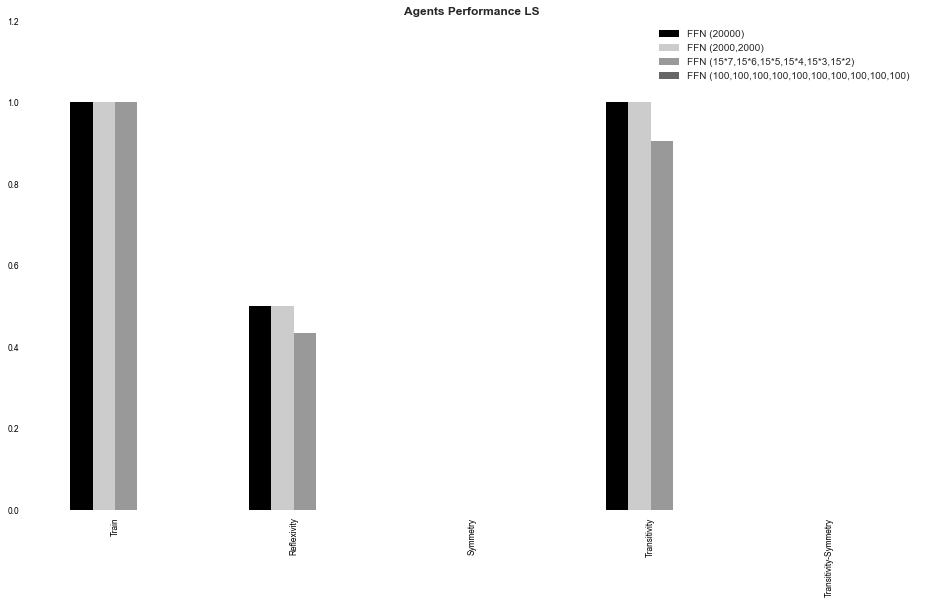

In [47]:
# results_df.T.plot(kind="bar", figsize=(16,9), title="Train only")
# results_df.T.plot(kind="bar", figsize=(16,9), title="Train with explicit relations")
# results_df.T.plot(kind="bar", figsize=(16,9), title="Train with no-go trials")
results_df.T.plot(kind="bar", figsize=(16,9), title="Agents Performance LS")

# Evaluate Reflexivity by pair

In [139]:
arch_1_predict=train_clasif[0].predict(reflexivity_values)
arch_2_predict=train_clasif[1].predict(reflexivity_values)
arch_3_predict=train_clasif[2].predict(reflexivity_values)
arch_4_predict=train_clasif[3].predict(reflexivity_values)

arch_1_predict_nogo=train_clasif[0].predict(reflexivity_nogo_values)
arch_2_predict_nogo=train_clasif[1].predict(reflexivity_nogo_values)
arch_3_predict_nogo=train_clasif[2].predict(reflexivity_nogo_values)
arch_4_predict_nogo=train_clasif[3].predict(reflexivity_nogo_values)

In [140]:
print("arch_1_go",
      f1_score(reflexivity_answers,
               arch_1_predict, 
               average='weighted'),
      "|",
      "arch_1_nogo",
      f1_score(reflexivity_nogo_answers,
               arch_1_predict_nogo, 
               average='weighted'))

print("arch_2_go",
      f1_score(reflexivity_answers,
               arch_2_predict, 
               average='weighted'),
      "|",
      "arch_2_nogo",
      f1_score(reflexivity_nogo_answers,
               arch_2_predict_nogo, 
               average='weighted'))

print("arch_3_go",
      f1_score(reflexivity_answers,
               arch_3_predict, 
               average='weighted'),
      "|",
      "arch_3_nogo",
      f1_score(reflexivity_nogo_answers,
               arch_3_predict_nogo, 
               average='weighted'))

print("arch_4_go",
      f1_score(reflexivity_answers,
               arch_4_predict, 
               average='weighted'),
      "|",
      "arch_4_nogo",
      f1_score(reflexivity_nogo_answers,
               arch_4_predict_nogo, 
               average='weighted'))

arch_1_go 0.5 | arch_1_nogo 0.0
arch_2_go 0.5 | arch_2_nogo 0.0
arch_3_go 0.43333333333333335 | arch_3_nogo 0.0
arch_4_go 0.0 | arch_4_nogo 0.0


C:\Users\Alexis\.conda\envs\sociadisticas\lib\site-packages\sklearn\metrics\_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\Alexis\.conda\envs\sociadisticas\lib\site-packages\sklearn\metrics\_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\Alexis\.conda\envs\sociadisticas\lib\site-packages\sklearn\metrics\_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\U

In [141]:
stim_list_reflex=list(reflexivity_info.st_sample.value_counts().sort_index().index)#list(set(reflexivity_info.st_sample))

In [142]:
reflexivity_performance_stimulus=[]
for stim in stim_list_reflex:
    filt_vect=reflexivity_info.st_sample==stim
    reflexivity_performance_stimulus.append([
        stim,
        f1_score(reflexivity_answers[filt_vect],
                 arch_1_predict[filt_vect], 
                 average='weighted'),
        f1_score(reflexivity_answers[filt_vect],
                 arch_2_predict[filt_vect], 
                 average='weighted'),
        f1_score(reflexivity_answers[filt_vect],
                 arch_3_predict[filt_vect], 
                 average='weighted'),
        f1_score(reflexivity_answers[filt_vect],
                 arch_4_predict[filt_vect], 
                 average='weighted')
    ])
#     print(stim, "arch_1_go",
#           f1_score(reflexivity_answers[filt_vect],
#                    arch_1_predict[filt_vect], 
#                    average='weighted'),
#           "|","arch_2_go",
#           f1_score(reflexivity_answers[filt_vect],
#                    arch_2_predict[filt_vect], 
#                    average='weighted'),
#           "|","arch_3_go",
#           f1_score(reflexivity_answers[filt_vect],
#                    arch_3_predict[filt_vect], 
#                    average='weighted'),
#           "|","arch_4_go",
#           f1_score(reflexivity_answers[filt_vect],
#                    arch_4_predict[filt_vect], 
#                    average='weighted')
#          )


In [143]:
round(pd.DataFrame(reflexivity_performance_stimulus, columns=["Stimulus", "A", "B", "C", "D"]),3)

,Stimulus,A,B,C,D
0,A1,0.0,0.0,0.000,0.0
1,A2,0.0,0.0,0.000,0.0
2,A3,0.0,0.0,0.000,0.0
3,A4,0.0,0.0,0.000,0.0
4,B1,1.0,1.0,1.000,0.0
5,B2,1.0,1.0,0.667,0.0
6,B3,1.0,1.0,1.000,0.0
7,B4,1.0,1.0,0.667,0.0
8,C1,0.0,0.0,0.000,0.0
9,C2,0.0,0.0,0.000,0.0


# Evaluate transitivity by pair

In [144]:
arch_1_predict=train_clasif[0].predict(transitivity_values)
arch_2_predict=train_clasif[1].predict(transitivity_values)
arch_3_predict=train_clasif[2].predict(transitivity_values)
arch_4_predict=train_clasif[3].predict(transitivity_values)

arch_1_predict_nogo=train_clasif[0].predict(transitivity_nogo_values)
arch_2_predict_nogo=train_clasif[1].predict(transitivity_nogo_values)
arch_3_predict_nogo=train_clasif[2].predict(transitivity_nogo_values)
arch_4_predict_nogo=train_clasif[3].predict(transitivity_nogo_values)

In [145]:
print("arch_1_go",
      f1_score(transitivity_answers,
               arch_1_predict, 
               average='weighted'),
      "|",
      "arch_1_nogo",
      f1_score(transitivity_nogo_answers,
               arch_1_predict_nogo, 
               average='weighted'))

print("arch_2_go",
      f1_score(transitivity_answers,
               arch_2_predict, 
               average='weighted'),
      "|",
      "arch_2_nogo",
      f1_score(transitivity_nogo_answers,
               arch_2_predict_nogo, 
               average='weighted'))

print("arch_3_go",
      f1_score(transitivity_answers,
               arch_3_predict, 
               average='weighted'),
      "|",
      "arch_3_nogo",
      f1_score(transitivity_nogo_answers,
               arch_3_predict_nogo, 
               average='weighted'))

print("arch_4_go",
      f1_score(transitivity_answers,
               arch_4_predict, 
               average='weighted'),
      "|",
      "arch_4_nogo",
      f1_score(transitivity_nogo_answers,
               arch_4_predict_nogo, 
               average='weighted'))

arch_1_go 1.0 | arch_1_nogo 0.0
arch_2_go 1.0 | arch_2_nogo 0.0
arch_3_go 0.9047619047619047 | arch_3_nogo 0.0
arch_4_go 0.0 | arch_4_nogo 0.0


C:\Users\Alexis\.conda\envs\sociadisticas\lib\site-packages\sklearn\metrics\_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\Alexis\.conda\envs\sociadisticas\lib\site-packages\sklearn\metrics\_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\Alexis\.conda\envs\sociadisticas\lib\site-packages\sklearn\metrics\_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\U

In [146]:
stim_list_transit=list(transitivity_info.st_sample.value_counts().sort_index().index)#list(set(reflexivity_info.st_sample))

In [149]:
transitivity_performance_stimulus=[]
for stim in stim_list_transit:
    filt_vect=transitivity_info.st_sample==stim
    transitivity_performance_stimulus.append([
        stim,
        f1_score(transitivity_answers[filt_vect],
                 arch_1_predict[filt_vect], 
                 average='weighted'),
        f1_score(transitivity_answers[filt_vect],
                 arch_2_predict[filt_vect], 
                 average='weighted'),
        f1_score(transitivity_answers[filt_vect],
                 arch_3_predict[filt_vect], 
                 average='weighted'),
        f1_score(transitivity_answers[filt_vect],
                 arch_4_predict[filt_vect], 
                 average='weighted')
    ])

round(pd.DataFrame(transitivity_performance_stimulus, columns=["Stimulus", "A", "B", "C", "D"]),3)

,Stimulus,A,B,C,D
0,A1,1.0,1.0,1.000,0.0
1,A2,1.0,1.0,0.667,0.0
2,A3,1.0,1.0,1.000,0.0
3,A4,1.0,1.0,0.667,0.0


In [150]:
arch_1_predict=train_clasif[0].predict(equivalence_values)
arch_2_predict=train_clasif[1].predict(equivalence_values)
arch_3_predict=train_clasif[2].predict(equivalence_values)
arch_4_predict=train_clasif[3].predict(equivalence_values)

arch_1_predict_nogo=train_clasif[0].predict(equivalence_nogo_values)
arch_2_predict_nogo=train_clasif[1].predict(equivalence_nogo_values)
arch_3_predict_nogo=train_clasif[2].predict(equivalence_nogo_values)
arch_4_predict_nogo=train_clasif[3].predict(equivalence_nogo_values)

In [151]:
stim_list_equivalence=list(equivalence_info.st_sample.value_counts().sort_index().index)#list(set(reflexivity_info.st_sample))

In [153]:
equivalence_performance_stimulus=[]
for stim in stim_list_equivalence:
    filt_vect=equivalence_info.st_sample==stim
    equivalence_performance_stimulus.append([
        stim,
        f1_score(equivalence_answers[filt_vect],
                 arch_1_predict[filt_vect], 
                 average='weighted'),
        f1_score(equivalence_answers[filt_vect],
                 arch_2_predict[filt_vect], 
                 average='weighted'),
        f1_score(equivalence_answers[filt_vect],
                 arch_3_predict[filt_vect], 
                 average='weighted'),
        f1_score(equivalence_answers[filt_vect],
                 arch_4_predict[filt_vect], 
                 average='weighted')
    ])

round(pd.DataFrame(equivalence_performance_stimulus, columns=["Stimulus", "A", "B", "C", "D"]),3)

,Stimulus,A,B,C,D
0,C1,0.0,0.0,0.0,0.0
1,C2,0.0,0.0,0.0,0.0
2,C3,0.0,0.0,0.0,0.0
3,C4,0.0,0.0,0.0,0.0
